In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy
import seaborn as sns
from scipy.stats import t
from collections import defaultdict 
from tqdm import tqdm
sns.set(rc={'figure.figsize':(16,8)})

# EX 1

## T test for coefficients significance:

$\frac{B_i}{SE(B_i)} = \frac{B_i}{SE(B_i)}$

$SE(B_i)  = \sqrt{\frac{1}{n - k} * \sum(y_i - \hat y_i)^2 * (X^TX)^{-1}_{i,i}}$

T has t-student with n-k-1 df

We reject null Hypothesis if  $|T| \geq q_{t(n-k)}(1-a/2)$

In [3]:
class Model:

  def __init__(self):
    self.X = np.random.normal(0, 1/np.sqrt(1000), size=(1000,950))
    self.beta = np.array([[3,3,3,3,3] + [0 for i in range(945)]]).T
    self.eps = np.random.normal(0, 1, size=(1000, 1))
    self.p = 950
    self.n = self.X.shape[0]

  def solve(self):
    Y = self.get_true_Y()
    self.beta_least_squares = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ Y
    Y_pred = self.get_perdicted_Y()
    self.variances = np.linalg.inv(self.X.T @ self.X) * 1/(self.n - self.p) * ((Y - Y_pred)**2).sum()
    self.variances = self.variances.diagonal().flatten()

  def get_perdicted_Y(self):
    Y_pred = self.X @ self.beta_least_squares
    return Y_pred
  
  def get_true_Y(self):
    return (self.X @ self.beta) + self.eps
  
  def get_smaller_instance(self, p: int):
    M = copy(self)
    M.X = self.X[:, :p]
    M.beta= self.beta[:p]
    M.eps = self.eps
    M.p = p
    M.n = M.X.shape[0]
    return M

## I

In [31]:
base_model = Model()

for p in [2,5,10,100,500,950]:
    model = base_model.get_smaller_instance(p)
    model.solve()

    # response variable
    Y = model.get_true_Y()
    Y_pred = model.get_perdicted_Y()
    RSS = ((Y - Y_pred) ** 2).sum()
    
    #E[PE] = E[RSS] + 2sigma^2p
    # = sigma^2(n - p) + 2sigma^2p 
    # because errors have variance = 1 (Identity on covariance) sigma = 1
    print("P = ", p)
    sigma = 1
    if p < -1:
        PE = RSS + model.n * (sigma ** 2)
        print("PE", PE) 
    else:
        PE = (sigma ** 2) * (model.n - p) + 2 * (sigma ** 2) * (p)
        print("PE", PE)

    
    #E[PE] = E[RSS] + 2sigma^2p = RSS + 2sigma^2 * p
    PE = RSS + 2 * (sigma ** 2) * p
    print("PE with rss:", PE)

    #E[PE] = E[RSS] + 2sigma^2p = RSS + 2sigma^2 * p
    # sigma = RSS / (n-p)
    PE = RSS + 2 * (RSS / (model.n - p)) * p
    print("PE with rss sigma unknowed:", PE)

    M = model.X @ np.linalg.inv(model.X.T @ model.X) @ model.X.T
    PE = (((Y - Y_pred) / (1 - np.diag(M).reshape((-1,1)))) ** 2).sum()

    print("PE with cross_validation:", PE)
    
    print("RSS", RSS, "\n")

P =  2
PE 1002
PE with rss: 1017.3827763278514
PE with rss sigma unknowed: 1017.444430741991
PE with cross_validation: 1017.499127130649
RSS 1013.3827763278514 

P =  5
PE 1005
PE with rss: 1020.9419522964303
PE with rss sigma unknowed: 1021.102172922525
PE with cross_validation: 1021.1758072072404
RSS 1010.9419522964303 

P =  10
PE 1010
PE with rss: 1017.4951910772381
PE with rss sigma unknowed: 1017.6466090787985
PE with cross_validation: 1017.9201229313844
RSS 997.4951910772381 

P =  100
PE 1100
PE with rss: 1106.7798573061073
PE with rss sigma unknowed: 1108.28649226302
PE with cross_validation: 1119.490918348121
RSS 906.7798573061073 

P =  500
PE 1500
PE with rss: 1487.765211598199
PE with rss sigma unknowed: 1463.295634794597
PE with cross_validation: 1968.9608751228634
RSS 487.76521159819896 

P =  950
PE 1950
PE with rss: 1947.6640943761397
PE with rss sigma unknowed: 1858.899680669448
PE with cross_validation: 19725.809370890813
RSS 47.66409437613969 



## II

In [14]:
results = np.zeros((100,6, 4))

In [38]:
for it in tqdm(range(100)):
    base_model = Model()
    for i, p in enumerate([2,5,10,100,500,950]):
        model = base_model.get_smaller_instance(p)
        model.solve()

        # response variable
        Y = model.get_true_Y()
        Y_pred = model.get_perdicted_Y()
        RSS = ((Y - Y_pred) ** 2).sum()

        #E[PE] = E[RSS] + 2sigma^2p
        # = sigma^2(n - p) + 2sigma^2p 
        # because errors have variance = 1 (Identity on covariance) sigma = 1
        # print("P = ", p)
        sigma = 1
        if p < -1:
            PE = RSS + model.n * (sigma ** 2)
            # print("PE", PE) 
        else:
            PE = (sigma ** 2) * (model.n - p) + 2 * (sigma ** 2) * (p)
            # print("PE", PE)


        #E[PE] = E[RSS] + 2sigma^2p = RSS + 2sigma^2 * p
        PE_rss = RSS + 2 * (sigma ** 2) * p
        # print("PE with rss:", PE)

        #E[PE] = E[RSS] + 2sigma^2p = RSS + 2sigma^2 * p
        # sigma = RSS / (n-p)
        PE_unkown = RSS + 2 * (RSS / (model.n - p)) * p
        # print("PE with rss sigma unknowed:", PE)

        M = model.X @ np.linalg.inv(model.X.T @ model.X) @ model.X.T
        PE_cv = (((Y - Y_pred) / (1 - np.diag(M).reshape((-1,1)))) ** 2).sum()
        results[it][i] = [PE, PE_rss, PE_unkown, PE_cv]

        # print("PE with cross_validation:", PE)
        


100%|█████████████████████████████████████████| 100/100 [00:31<00:00,  3.13it/s]


In [43]:
data = results[:,:,3] - results[:,:,0]

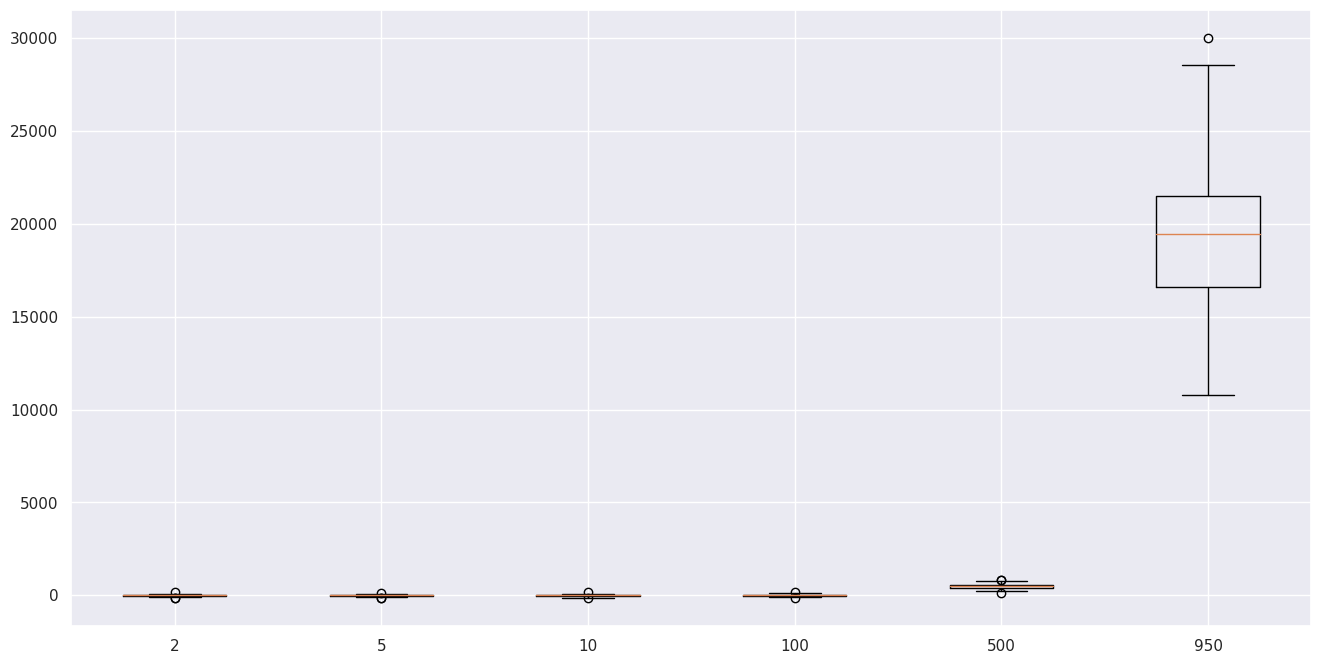

In [44]:
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['2', '5', '10', '100', '500', '950'])
plt.show()